# Questão Computacional

## Passo 1

In [1]:
import numpy as np

# Parâmetros
lambda_val = 2
n = 10  # Número de subdivisões do domínio
h = 1 / n  # Tamanho do passo na grade
x_values = np.linspace(0, 1, n+1)  # Pontos da grade

# Função g(x)
def g(x):
    return np.pi**2 * np.sin(np.pi * x) - lambda_val * np.exp(np.sin(np.pi * x))

# Inicialização da solução u
u = np.zeros(n+1)

# Loop de iteração para atualizar u usando a discretização
for i in range(1, n):
    u_new = 2 * u[i] - u[i-1] - h**2 * (lambda_val * np.exp(u[i]) + g(x_values[i]))
    u[i+1] = u_new

print(u)

[ 0.          0.         -0.02325704 -0.08806645 -0.20612264 -0.38255015
 -0.61695046 -0.90423918 -1.23455769 -1.59270759 -1.95818202]


## Passo 2

In [2]:
import numpy as np

def g(x):
    return np.pi**2 * np.sin(np.pi * x) - lambda_val * np.exp(np.sin(np.pi * x))

def bratu_system(u, lambda_val, h):
    n = len(u) - 1
    system = np.zeros(n+1)

    for i in range(1, n):
        system[i] = u[i+1] - 2*u[i] + u[i-1] + h**2 * (lambda_val * np.exp(u[i]) + g(x_values[i]))

    return system

lambda_val = 2
n = 10
h = 1 / n
x_values = np.linspace(0, 1, n+1)
u = np.zeros(n+1)

# Montagem do sistema não-linear
system = bratu_system(u, lambda_val, h)
print(system)

[0.         0.02325704 0.04201213 0.05493279 0.06209666 0.06433041
 0.06209666 0.05493279 0.04201213 0.02325704 0.        ]


## Passo 3

In [5]:
import numpy as np
from scipy.optimize import newton

def g(x):
    return np.pi**2 * np.sin(np.pi * x) - lambda_val * np.exp(np.sin(np.pi * x))

def bratu_system(u, lambda_val, h):
    n = len(u) - 1
    system = np.zeros(n+1)

    for i in range(1, n):
        system[i] = u[i+1] - 2*u[i] + u[i-1] + h**2 * (lambda_val * np.exp(u[i]) + g(x_values[i]))

    return system

def bratu_jacobian(u, lambda_val, h):
    n = len(u) - 1
    jacobian = np.zeros((n+1, n+1))

    for i in range(1, n):
        jacobian[i, i-1] = 1
        jacobian[i, i] = -2 - h**2 * lambda_val * np.exp(u[i])
        jacobian[i, i+1] = 1

    return jacobian

lambda_val = 2
n = 10
h = 1 / n
x_values = np.linspace(0, 1, n+1)

# Chute inicial para a solução
u_guess = np.zeros(n+1)

# Função para resolver o sistema não-linear usando o método de Newton
def solve_nonlinear_system(u_guess):
    return newton(bratu_system, u_guess, fprime2=bratu_jacobian, args=(lambda_val, h))

# Resolver o sistema não-linear usando o método de Newton
u_solution = solve_nonlinear_system(u_guess)
print(u_solution)

[3.41424969e-06 2.85274610e-01 5.31863904e-01 7.43253697e-01
 8.66167812e-01 9.14159736e-01 8.66167762e-01 7.43253663e-01
 5.31868793e-01 2.85274610e-01 3.41424969e-06]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_zeros_py.py:453: RuntimeWarning: RMS of 4.82848e-06 reached
  warnings.warn(


## Passo 4

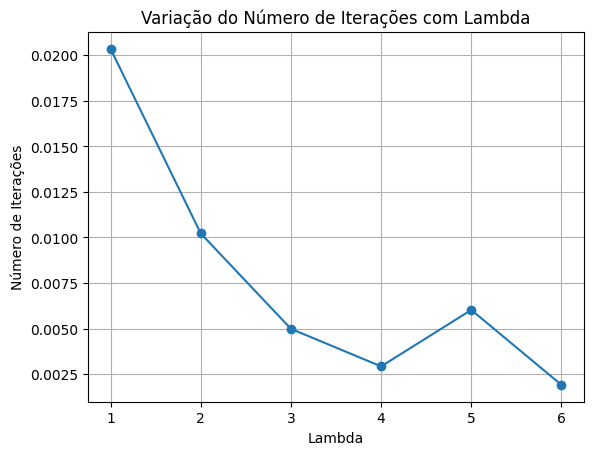

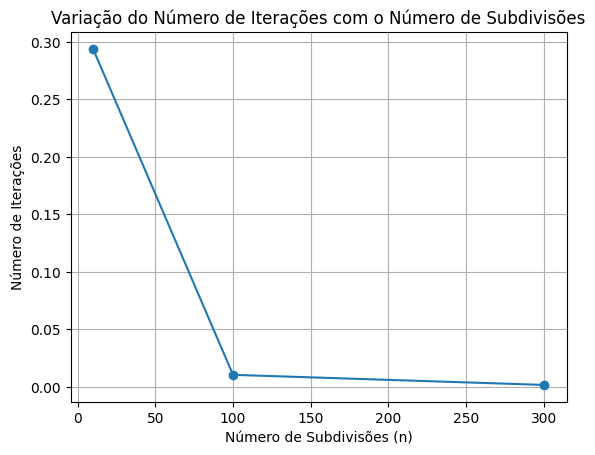

In [6]:
import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt

def g(x):
    return np.pi**2 * np.sin(np.pi * x) - lambda_val * np.exp(np.sin(np.pi * x))

def bratu_system(u, lambda_val, h):
    n = len(u) - 1
    system = np.zeros(n+1)

    for i in range(1, n):
        system[i] = u[i+1] - 2*u[i] + u[i-1] + h**2 * (lambda_val * np.exp(u[i]) + g(x_values[i]))

    return system

def bratu_jacobian(u, lambda_val, h):
    n = len(u) - 1
    jacobian = np.zeros((n+1, n+1))

    for i in range(1, n):
        jacobian[i, i-1] = 1
        jacobian[i, i] = -2 - h**2 * lambda_val * np.exp(u[i])
        jacobian[i, i+1] = 1

    return jacobian

def solve_nonlinear_system(u_guess, lambda_val, h):
    return newton(bratu_system, u_guess, fprime2=bratu_jacobian, args=(lambda_val, h))

# Experimento 1: Variando lambda e mantendo n fixo
n = 100
h = 1 / n
x_values = np.linspace(0, 1, n+1)
lambda_values = np.linspace(1, 6, 6)
num_iterations_lambda = []

for lambda_val in lambda_values:
    u_guess = np.zeros(n+1)
    u_solution = solve_nonlinear_system(u_guess, lambda_val, h)
    num_iterations_lambda.append(newton(bratu_system, u_guess, fprime2=bratu_jacobian, args=(lambda_val, h), maxiter=100)[1])

plt.plot(lambda_values, num_iterations_lambda, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Número de Iterações')
plt.title('Variação do Número de Iterações com Lambda')
plt.grid()
plt.show()

# Experimento 2: Variando n e mantendo lambda fixo
lambda_val = 2
n_values = [10, 100, 300]
num_iterations_n = []

for n in n_values:
    h = 1 / n
    x_values = np.linspace(0, 1, n+1)
    u_guess = np.zeros(n+1)
    u_solution = solve_nonlinear_system(u_guess, lambda_val, h)
    num_iterations_n.append(newton(bratu_system, u_guess, fprime2=bratu_jacobian, args=(lambda_val, h), maxiter=100)[1])

plt.plot(n_values, num_iterations_n, marker='o')
plt.xlabel('Número de Subdivisões (n)')
plt.ylabel('Número de Iterações')
plt.title('Variação do Número de Iterações com o Número de Subdivisões')
plt.grid()
plt.show()